<a href="https://colab.research.google.com/github/avishek-astra/Deep_Learning_Experiments/blob/main/Convolution_transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import libraries
import numpy as np
import torch

# NEW!
import torchvision
import torchvision.transforms as T

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

Import a dataset

In [3]:
#download the CIFAR10 dataset
cdata=torchvision.datasets.CIFAR10(root='cifar10',download=True)
print(cdata)

100%|██████████| 170M/170M [00:03<00:00, 48.2MB/s]


Dataset CIFAR10
    Number of datapoints: 50000
    Root location: cifar10
    Split: Train


In [4]:
#check out the shape of the dataset
print(cdata.data.shape)

#the unique categories
print(cdata.classes)

#.target is a list of targets converted to ints
print(len(cdata.targets))

(50000, 32, 32, 3)
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
50000


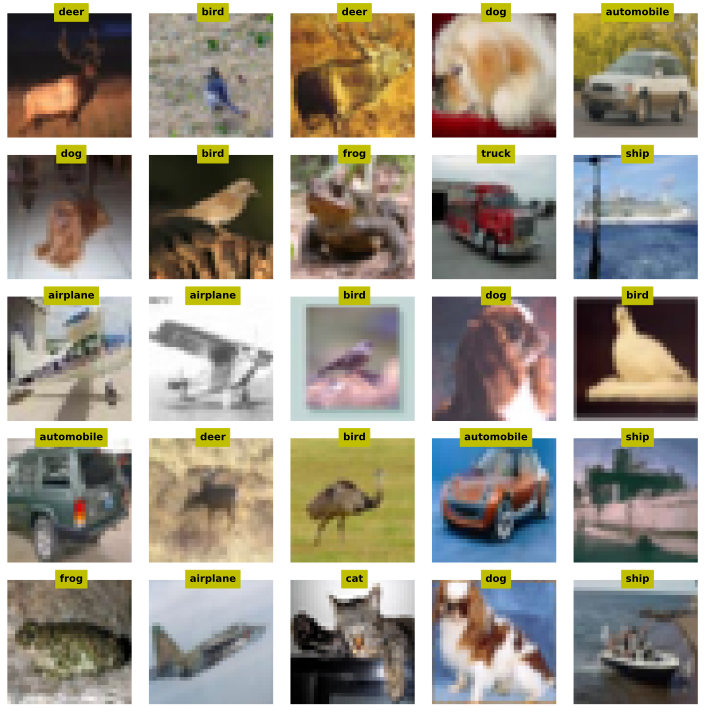

In [6]:
#inspect a few random images
fig,axs=plt.subplots(5,5,figsize=(10,10))
for ax in axs.flatten():
  #select a random picture
  randidx=np.random.choice(len(cdata.targets))
  #extract that image
  pic=cdata.data[randidx,:,:,:]
  #and its label
  label=cdata.classes[cdata.targets[randidx]]
  #plot it
  ax.imshow(pic)
  ax.text(16,0,label,ha='center',fontweight='bold',color='k',backgroundcolor='y')
  ax.axis('off')
plt.tight_layout()
plt.show()


Apply some transformations

In [7]:
Ts=T.Compose([T.ToTensor(),
              T.Resize(32*4),
              T.Grayscale(num_output_channels=1)])
#include the transform in the dataset
cdata.transform=Ts
#you can also apply the transforms immediately when loading in the data
#cdata=torchvision.datasets.CIFAR10(root='cifar10',download=True,transform=Ts)

#Important!Adding a transform doesn't change the image data:
print(cdata.data[123,:,:,:].shape)

(32, 32, 3)


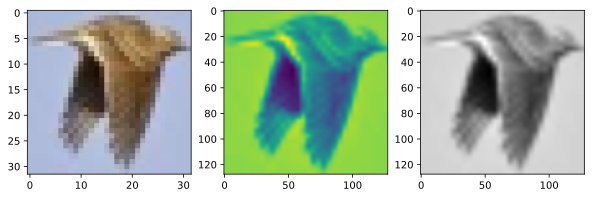

In [8]:
#apply the transform
#option 1a:apply the transform 'externally' to an image
img1=Ts(cdata.data[123,:,:,:])
#option 1b: use the embedded transform
img2=cdata.transform(cdata.data[123,:,:,:])
#let's see what we've done!
fig,ax=plt.subplots(1,3,figsize=(10,4))
ax[0].imshow(cdata.data[123,:,:,:])
ax[1].imshow(torch.squeeze(img1))
ax[2].imshow(torch.squeeze(img2),cmap='gray')
plt.show()

In [13]:
??T.ToTensor()

Object `T.ToTensor()` not found.
